# Scikit-learn

ศึกษา MNIST dataset ด้วย scikit-learn

* Load 
* Explore 
* Pre-process
* Unsupervised Learning (K-Means)
* Supervised Learning (Support Vector machine)

# Load Data

In [19]:
from sklearn import datasets

digits = datasets.load_digits()

In [2]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
print(type(digits.data))
print(digits.data.shape)
print(digits.data[0])

<class 'numpy.ndarray'>
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [4]:
print(digits.target[0])

0


In [5]:
print(digits.images[0])
print(digits.images.shape)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(1797, 8, 8)


# Explore MNIST data

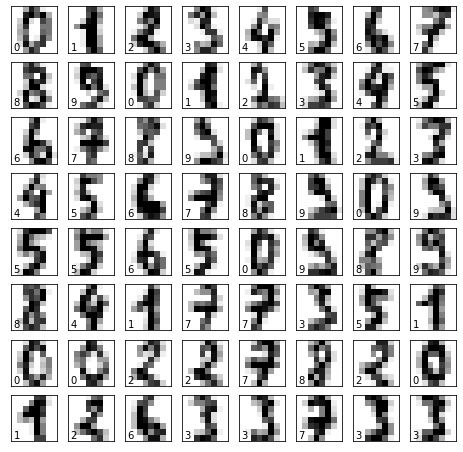

In [6]:
import matplotlib.pyplot as plt

images_and_labels = list(zip(digits.images, digits.target))

fig = plt.figure(figsize=(8,8))

for index, (image, label) in enumerate(images_and_labels[:64]):
  ax = fig.add_subplot(8, 8, index+1, xticks=[], yticks=[])
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.text(0, 7, str(label))

plt.show()

# Dimensionality Reduction
* PCA (Principal Component Analysis)

In [7]:
from sklearn.decomposition import PCA

# digits.data (1797, 64)
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(digits.data)

In [8]:
digits.data.shape, reduced_data.shape

((1797, 64), (1797, 2))

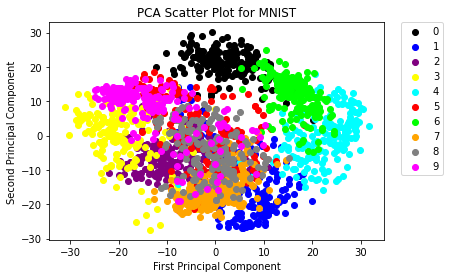

In [9]:
colors = ['black', 'blue', 'purple', 'yellow', 'cyan', 'red', 'lime','orange', 'gray','magenta']

for i in range(len(colors)):
  x = reduced_data[:, 0][digits.target == i]
  y = reduced_data[:, 1][digits.target == i]
  plt.scatter(x, y, c=colors[i])

plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot for MNIST")
plt.show()

# Preprocessing

In [10]:
# scale ข้อมูล ให้อยู่ในช่วงมาตรฐาน
from sklearn.preprocessing import scale

data = scale(digits.data)

In [11]:
# แบ่งข้อมูลเป็น training, test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.33, random_state=41) 
#2/3 train, 1/3 test

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1203, 64), (594, 64), (1203,), (594,))

# Clustering using K-means

In [13]:
from sklearn import cluster

clf = cluster.KMeans(n_clusters=10, random_state=42)

clf.fit(X_train)

KMeans(n_clusters=10, random_state=42)

In [14]:
y_pred = clf.predict(X_test)

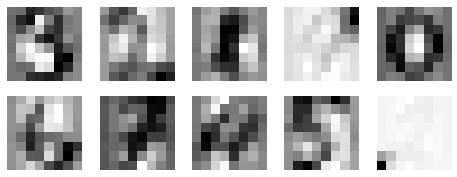

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,3))

for i in range(10):
  ax = fig.add_subplot(2, 5, 1+i)
  ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
  plt.axis('off')

plt.show()

In [16]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0  0  0 55  0  0  1  0  0]
 [ 1 11 30  0  0  0  0 20  1  0]
 [ 1 51  4  0  0  0  0  0  0  0]
 [55  1  1  0  0  0  1  0  1  0]
 [ 0  0  0  3  0  0  2 51  0  0]
 [13  0  1  0  0  2  1  0 44  0]
 [ 0  0  2  0  0 62  0  0  0  0]
 [ 0  0  0  3  0  0 53  0  3  0]
 [16  1 31  0  0  0  0  0  3  0]
 [56  0  1  1  0  0  3  6  2  0]]


# Supervised Learning (SVM)


In [17]:
from sklearn.svm import SVC

clf_svm = SVC(C=10, kernel='rbf', gamma=0.001)

clf_svm.fit(X_train, y_train)

y_pred_svm = clf_svm.predict(X_test)

In [18]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.95      0.98      0.97        63
           2       0.98      1.00      0.99        56
           3       0.98      0.97      0.97        59
           4       0.98      0.98      0.98        56
           5       0.98      1.00      0.99        61
           6       1.00      1.00      1.00        64
           7       1.00      1.00      1.00        59
           8       0.94      0.92      0.93        51
           9       0.99      0.96      0.97        69

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594

